In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
(X_train_all, Y_train_all), (X_test_all, Y_test_all) = tf.keras.datasets.cifar10.load_data()

x_test = X_train_all[:500]
y_test = Y_train_all[:500]
x_train = X_train_all[500:]
y_train = Y_train_all[500:]

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


# Dataset Preprocessing

Step 1: Convert pixel values to float32 and scale to [0, 1]

Step 2: Rescale to [-1, 1]

Step 3: Augment the data with flip up and rotate 90 degrees, and label them into 3 categories

Step 4: Convert labels to one-hot encoding


In [ ]:

x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

# Rescale to [-1, 1]
x_train = 2 * x_train - 1
x_test = 2 * x_test - 1

x_train_vflip = np.flipud(x_train)

x_train_rot90 = np.rot90(x_train, k=3, axes=(1,2))

y_train_base = np.repeat(0,y_train.shape[0])
y_train_vflip = np.repeat(1,y_train.shape[0])
y_train_rot90 = np.repeat(2,y_train.shape[0])

x_train_aug = np.concatenate((x_train, x_train_vflip, x_train_rot90))
y_train_aug = np.concatenate((y_train_base, y_train_vflip, y_train_rot90))

y_train_aug = tf.keras.utils.to_categorical(y_train_aug, num_classes=3)

X_train_augmented, Y_augmented = shuffle(x_train_aug, y_train_aug, random_state=42)

# Model to create a Pretrained model for transfer learning



In [ ]:
def model():
    # Input layer
    inputs = layers.Input(shape=(32, 32, 3))

    # 1st Conv layer
    x = layers.Conv2D(10, (5, 5), strides=1, padding='same',
                      activation='relu', kernel_initializer='he_normal')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # 2nd Conv layer
    x = layers.Conv2D(10, (5, 5), strides=1, padding='same',
                      activation='relu', kernel_initializer='he_normal')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2), strides=2)(x)

    # Flatten + Fully connected layers
    x = layers.Flatten()(x)
    x = layers.Dense(20, activation='relu', kernel_initializer='he_normal')(x)
    outputs = layers.Dense(3, activation='softmax')(x)

    # Define the model
    model = models.Model(inputs=inputs, outputs=outputs, name="base_model")

    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()
    return model


In [ ]:
model_aug = model()
history = model_aug.fit(X_train_augmented, Y_augmented,
    epochs=500,
    batch_size=64,
    validation_split=0.2,
    verbose=1)

Model: "base_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 10)     │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 10)     │         2,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        12,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            63 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,153 (63.10 KB)

 Trainable params: 16,153 (63.10 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.4781 - loss: 0.9435 - val_accuracy: 0.5226 - val_loss: 0.8511
Epoch 2/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5409 - loss: 0.8279 - val_accuracy: 0.5515 - val_loss: 0.7998
Epoch 3/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5551 - loss: 0.7923 - val_accuracy: 0.5575 - val_loss: 0.7819
Epoch 4/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5661 - loss: 0.7663 - val_accuracy: 0.5578 - val_loss: 0.7770
Epoch 5/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.5717 - loss: 0.7517 - val_accuracy: 0.5635 - val_loss: 0.7575
Epoch 6/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.5774 - loss: 0.7399 - val_accuracy: 0.5684 - val_loss: 0.7560
Epoch 7/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5805 - loss: 0.7270 - val_accuracy: 0.5716 - val_loss: 0.7413
Epoch 8/500
1857/1857 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.5841 - loss:

In [ ]:
model_aug.save('/content/drive/MyDrive/Colab Notebooks/augmented_model_4.h5')

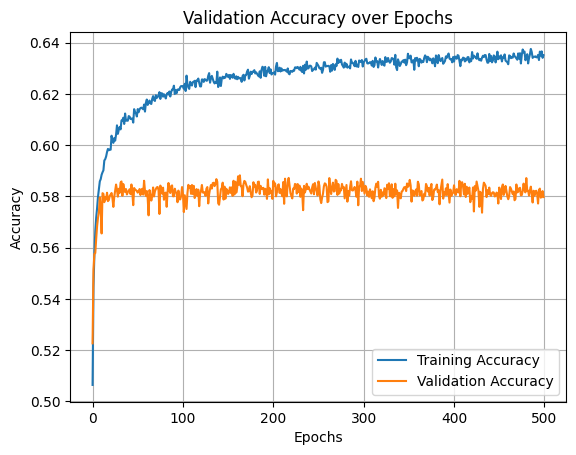

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Validation Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Data Preparation for minimal model

In [14]:
#Training data

X_train_minimal = x_test
Y_train_minimal = tf.keras.utils.to_categorical(y_test, num_classes=10)

X_test_all = X_test_all.astype('float32')/255.0
X_test_all = 2 * X_test_all - 1

X_test_minimal = X_test_all
Y_test_minimal = tf.keras.utils.to_categorical(Y_test_all, num_classes=10)

# Model for Training 10 class data


In [ ]:
def model_1():
  model = models.Sequential([
      # 1st Conv layer
      layers.Conv2D(10, (5,5), strides=1, padding='same',
                    activation='relu', kernel_initializer='he_normal',
                    input_shape=(32,32,3)),
      layers.MaxPooling2D(pool_size=(2,2), strides=2),

      # 2nd Conv layer
      layers.Conv2D(10, (5,5), strides=1, padding='same',
                    activation='relu', kernel_initializer='he_normal'),
      layers.MaxPooling2D(pool_size=(2,2), strides=2),

      # Flatten + Fully connected layers
      layers.Flatten(),
      layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
      layers.Dense(10, activation='softmax')
  ])

  model.summary()
  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

# Training model with minimal data from the test set

In [ ]:
model_baseline = model_1()
history_baseline = model_baseline.fit(X_train_minimal, Y_train_minimal,
    epochs=2000,
    batch_size=64,
    validation_data = (X_test_minimal, Y_test_minimal),
    verbose=1)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 10)     │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 10)     │         2,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        12,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,300 (63.67 KB)

 Trainable params: 16,300 (63.67 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 11s 594ms/step - accuracy: 0.1045 - loss: 2.4018 - val_accuracy: 0.1635 - val_loss: 2.2666
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.1981 - loss: 2.1758 - val_accuracy: 0.2036 - val_loss: 2.2102
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2263 - loss: 2.0971 - val_accuracy: 0.2178 - val_loss: 2.1709
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3076 - loss: 1.9874 - val_accuracy: 0.2408 - val_loss: 2.1087
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.3554 - loss: 1.8746 - val_accuracy: 0.2553 - val_loss: 2.0932
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.3862 - loss: 1.7733 - val_accuracy: 0.2735 - val_loss: 2.0506
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.4128 - loss: 1.6743 - val_accuracy: 0.2979 - val_loss: 2.0510
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.4793 - loss: 1.5723 - val_accuracy: 0.3161 -

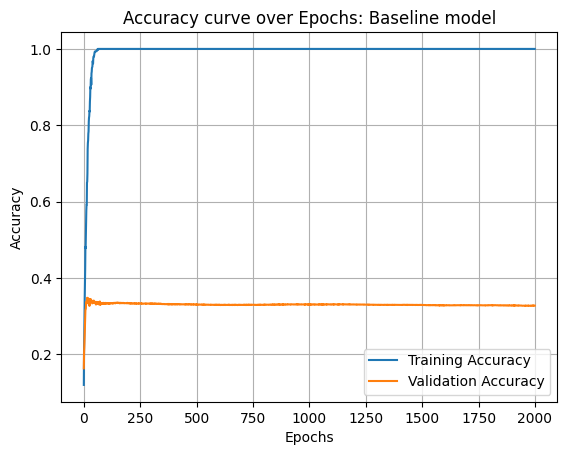

In [ ]:
plt.plot(history_baseline.history['accuracy'], label='Training Accuracy')
plt.plot(history_baseline.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy curve over Epochs: Baseline model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model_baseline.save('/content/drive/MyDrive/Colab Notebooks/model_baseline_model_4_2000.h5')

# Preparing transfer learing model for minimal data

In [12]:

pre_trained_path = '/content/drive/MyDrive/Colab Notebooks/augmented_model_4.h5'
Pre_trained = tf.keras.models.load_model(pre_trained_path)

# Pre_trained = model_aug

In [15]:
base_output = Pre_trained.layers[-2].output
base_model = tf.keras.Model(inputs=Pre_trained.input, outputs=base_output)



for layer in base_model.layers[:-2]:
    layer.trainable = False

x = layers.Dense(10, activation='softmax')(base_model.output)

transfer_model = tf.keras.Model(inputs=base_model.input, outputs=x)

transfer_model.summary()

transfer_model.compile(
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
loss='categorical_crossentropy',
metrics=['accuracy']
)


history_transfer = transfer_model.fit(X_train_minimal, Y_train_minimal,
epochs=2000,
batch_size=64,
validation_data=(X_test_minimal, Y_test_minimal)
)

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 10)     │           760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 10)     │         2,510 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 10)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 640)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 20)             │        12,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,300 (63.67 KB)

 Trainable params: 13,030 (50.90 KB)

 Non-trainable params: 3,270 (12.77 KB)

Epoch 1/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - accuracy: 0.0608 - loss: 32.3239 - val_accuracy: 0.0853 - val_loss: 26.9757
Epoch 2/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 598ms/step - accuracy: 0.0829 - loss: 27.2331 - val_accuracy: 0.0934 - val_loss: 21.6175
Epoch 3/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 778ms/step - accuracy: 0.0823 - loss: 21.7285 - val_accuracy: 0.0980 - val_loss: 17.3120
Epoch 4/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 493ms/step - accuracy: 0.0889 - loss: 17.2529 - val_accuracy: 0.0774 - val_loss: 13.9141
Epoch 5/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 486ms/step - accuracy: 0.1004 - loss: 13.2977 - val_accuracy: 0.0770 - val_loss: 11.3211
Epoch 6/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 736ms/step - accuracy: 0.0880 - loss: 10.6743 - val_accuracy: 0.0822 - val_loss: 9.3643
Epoch 7/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 493ms/step - accuracy: 0.0776 - loss: 8.3386 - val_accuracy: 0.0866 - val_loss: 7.9296
Epoch 8/2000
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 735ms/step - accuracy: 0.0883 - loss: 7.8202 - val_acc

In [16]:
transfer_model.save('/content/drive/MyDrive/Colab Notebooks/transfer_model_4_2000.h5')

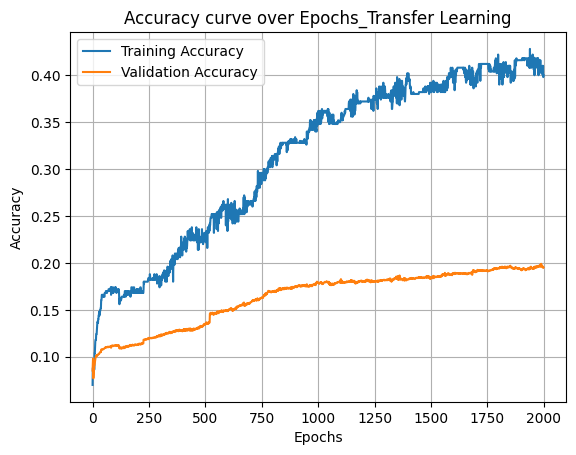

In [17]:
plt.plot(history_transfer.history['accuracy'], label='Training Accuracy')
plt.plot(history_transfer.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy curve over Epochs_Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Interpretation

1. While the baseline model shows the overfitting over training, the transfer learning model shows moderate fitting with strong raise in the learning curve.

In [7]:
# from google.colab import drive
# drive.mount('/content/drive')

from google.colab import files

!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Another copy of DLS_HW2_4_part2.ipynb"
files.download("/content/drive/MyDrive/Colab Notebooks/Another copy of DLS_HW2_4_part2.html")

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Another copy of DLS_HW2_4_part2.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 1544999 bytes to /content/drive/MyDrive/Colab Notebooks/Another copy of DLS_HW2_4_part2.html


FileNotFoundError: Cannot find file: /content/drive/MyDrive/Colab Notebooks/DLS_HW2_4_part2.html